# 2. 最尤推定

## 2.1 生成モデルの概要

### 2.1.1 生成モデルとは

目標：あるデータ$x$の確率分布$p(x)$をモデル化すること

### 2.1.2 母集団とサンプル

用語
- 母集団：対象となる全体の集団
- サンプル：母集団から抽出された一部のデータの集合


手順
1. モデル化：真の確率分布が「パラメータで調整可能な確率分布」で近似されると仮定する

2. パラメータ推定：その確率分布がサンプルデータに合うようにパラメータ推定する

## 2.2 実データを使った生成モデルの実装


使用するデータセット：「SOCR Data」
1993年の香港における18歳の身長データ25000件


### 2.2.1 身長データセットの読み込み

(25000,)


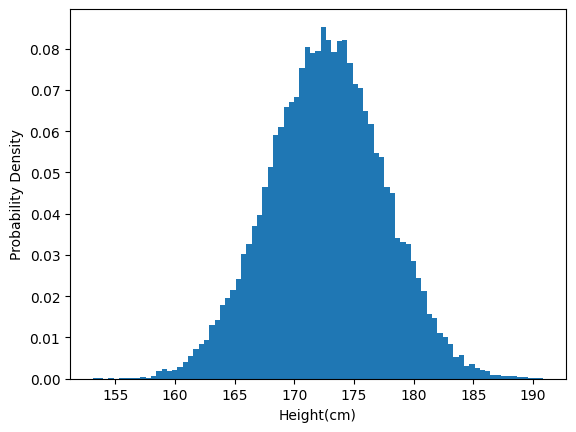

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = os.path.join('','height.txt')
xs  = np.loadtxt(path)
print(xs.shape) # (25000,)

plt.hist(xs, bins='auto', density=True)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

### 2.2.2 正規分布における生成モデル

1. モデル化：身長データが「正規分布」であると仮定する
2. パラメータ推定：サンプルをもとに正規分布のパラメータを推定する

In [4]:
# xs は25,000個の要素を持つ1次元配列
mu = np.mean(xs)
sigma = np.std(xs)

print(mu)
print(sigma)

172.70250853667997
4.830167473396299


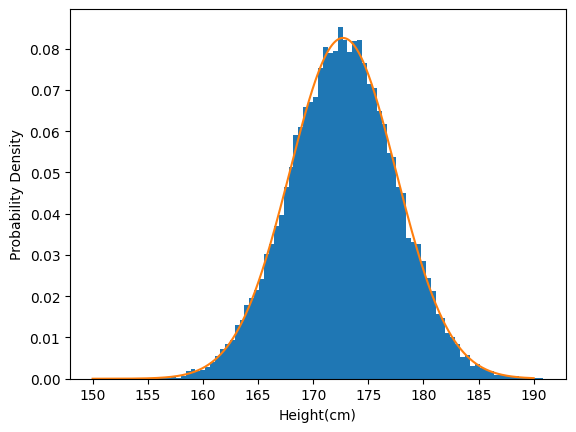

In [5]:

import numpy as np
import matplotlib.pyplot as plt

path = 'height.txt'
xs = np.loadtxt(path)

mu = np.mean(xs)
sigma = np.std(xs)

# normal distribution
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y
x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

# plot
plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

## 2.3 最尤推定の理論

$$
\hat{\mu} = \frac{1}{N} \sum_{n=1}^{N} x^{(n)}
$$


$$
\hat{\sigma}^2 = \frac{1}{N} \sum_{n=1}^{N} (x^{(n)} - \hat{\mu})^2
$$

### 2.3.1 尤度の最大化

- 尤度(尤度関数)：あるパラメータ$\theta$に対して，サンプル$D$がどれぐらい起こりうるかを確率密度として表したもの
- 最尤推定：尤度$p(D;\theta)$を最大化するパラメータ$\theta$を見つける手法

### 2.3.2 微分を使って最大値を探す

$$
y = -2x^2+3x+4
$$

$$
\frac{dy}{dx} = -4x+3 = 0  
\\
x = \frac{3}{4}
$$

### 2.3.3 正規分布の最尤推定


ホワイトボード

## 2.4 生成モデルの用途

1. モデル化：身長データが「正規分布」であると仮定する
2. パラメータ推定：サンプルをもとに正規分布のパラメータを推定する

In [6]:
import numpy as np
import matplotlib.pyplot as plt

path = 'height.txt'
xs = np.loadtxt(path)
print(xs.shape)

# plt.hist(xs, bins='auto', density=True)
# plt.xlabel('Height(cm)')
# plt.ylabel('Probability Density')
# plt.show()

mu = np.mean(xs)
sigma = np.std(xs)

print(mu)
print(sigma)

(25000,)
172.70250853667997
4.830167473396299


### 2.4.1 新しいデータの生成

In [7]:
np.random.normal(loc=0.0, scale=1.0, size=None)


1.0246681471227919

In [8]:
sample = np.random.normal(mu, sigma)
print(sample)

174.4053475114293


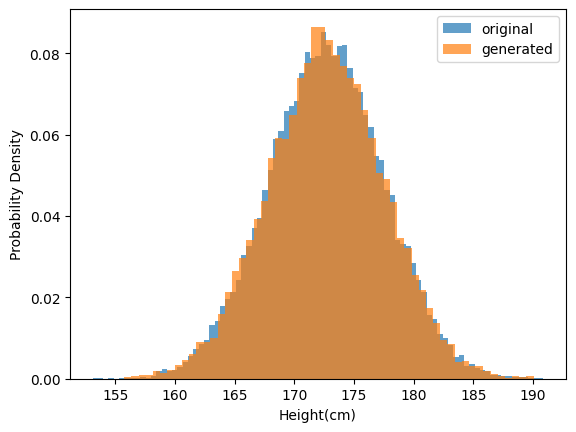

In [9]:
import os
import numpy as np


path = 'height.txt'
xs = np.loadtxt(path)
mu = np.mean(xs)
sigma = np.std(xs)

samples = np.random.normal(mu, sigma, 10000)

plt.hist(xs, bins='auto', density=True, alpha=0.7, label='original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='generated')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### 2.4.2 確率の計算

In [10]:
from scipy.stats import norm

x = 1.0
p = norm.cdf(x,loc=0, scale=1)

print(p)


0.8413447460685429


scipy.stas.norm

In [11]:
import numpy as np
from scipy.stats import norm


path = 'height.txt'
xs = np.loadtxt(path)
mu = np.mean(xs)
sigma = np.std(xs)

p1 = norm.cdf(160, mu, sigma)
print('p(x <= 160):', p1)

p2 = norm.cdf(180, mu, sigma)
print('p(x > 180):', 1-p2)

p(x <= 160): 0.004271406830855
p(x > 180): 0.06541774339950823
